In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os

In [5]:
df = pd.read_csv("../data/coffee_quality_data_set.csv")

In [6]:
df_graph = df.copy()

In [7]:
df.head(5)

Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN      Coffee Quality Union  1700-1930        Piendamo,Cauca  ...   
1        NaN  Taiwan Coffee Laboratory       1200                Chiayi  ...   
2        NaN  Taiwan Coffee Laboratory       1300  Laos Borofen Plateau  ...   
3        NaN      Coffee Quality Union       1900    Los Santos,Tarrazu  ...   
4        NaN      Coffee Quality Union  1850-2100         Popayan,Cauca  ...   

  Total Cup Points  Moisture Percentage Category One Defects Quakers  \
0            89.33                 11.8                    0       0   
1            87.58                 10.5                    0       0   
2            87.42                 10.4                    0       0   
3            87.17                 11.8                    0       0   
4            87.08                 11.6                    0       2   

          Color Category Two Defects            Expiration  \
0         green                    3  September 21st, 2023   
1    blue-green                    0   November 15th, 2023   
2     yellowish                    2   November 15th, 2023   
3         green                    0  September 21st, 2023   
4  yellow-green                    2       March 5th, 2024   

                 Certification Body  \
0             Japan Coffee Exchange   
1  Taiwan Coffee Laboratory 台灣咖啡研究室   
2  Taiwan Coffee Laboratory 台灣咖啡研究室   
3             Japan Coffee Exchange   
4             Japan Coffee Exchange   

                               Certification Address  \
0  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
1  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
2  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
3  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
4  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   

                     Certification Contact  
0  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
1     Lin, Jen-An Neil 林仁安 - 886-289116612  
2     Lin, Jen-An Neil 林仁安 - 886-289116612  
3  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
4  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  

[5 rows x 41 columns]

In [8]:
colunas = df.columns[:]
colunas

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [9]:
df.drop(df.columns[[0, 1, 4, 6, 7, 8, 14, 18, 26, 27, 28, 34]], axis=1, inplace=True)

In [10]:
df.columns

Index(['Country of Origin', 'Farm Name', 'Mill', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Grading Date',
       'Owner', 'Variety', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Color', 'Category Two Defects', 'Expiration', 'Certification Body',
       'Certification Address', 'Certification Contact'],
      dtype='object')

In [11]:
df = df[(df['Category Two Defects']!=16)&(df['Category Two Defects']!=10)&(df['Category Two Defects']!=13)]
df = df[(df['Category One Defects']!=5)&(df['Category One Defects']!=3)&(df['Category One Defects']!=4)]

In [12]:
df.isna().sum()

Country of Origin        0
Farm Name                2
Mill                     3
Region                   2
Producer                 1
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Grading Date             0
Owner                    0
Variety                  6
Processing Method        5
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
dtype: int64

In [13]:
df['Farm Name'].fillna('none', inplace = True)
df['Mill'].fillna('none', inplace = True)
df['Region'].fillna('none', inplace = True)
df['Producer'].fillna('none', inplace = True)
df['Variety'].fillna('none', inplace = True)
df['Processing Method'].fillna('none', inplace = True)

In [14]:
df.isna().sum()

Country of Origin        0
Farm Name                0
Mill                     0
Region                   0
Producer                 0
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Grading Date             0
Owner                    0
Variety                  0
Processing Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
dtype: int64

In [15]:
df.head(5)

Country of Origin                 Farm Name                           Mill  \
0          Colombia          Finca El Paraiso               Finca El Paraiso   
1            Taiwan  Royal Bean Geisha Estate       Royal Bean Geisha Estate   
2              Laos        OKLAO coffee farms  oklao coffee processing plant   
3        Costa Rica                 La Cumbre        La Montana Tarrazu MIll   
4          Colombia           Finca Santuario                Finca Santuario   

                 Region               Producer  Number of Bags Bag Weight  \
0        Piendamo,Cauca  Diego Samuel Bermudez               1      35 kg   
1                Chiayi                    曾福森               1      80 kg   
2  Laos Borofen Plateau             WU TAO CHI              19      25 kg   
3    Los Santos,Tarrazu    Santa Maria de Dota               1      22 kg   
4         Popayan,Cauca       Camilo Merizalde               2      24 kg   

                 In-Country Partner          Grading Date  \
0             Japan Coffee Exchange  September 21st, 2022   
1  Taiwan Coffee Laboratory 台灣咖啡研究室   November 15th, 2022   
2  Taiwan Coffee Laboratory 台灣咖啡研究室   November 15th, 2022   
3             Japan Coffee Exchange  September 21st, 2022   
4             Japan Coffee Exchange       March 6th, 2023   

                              Owner  ... Defects Total Cup Points  \
0              Coffee Quality Union  ...     0.0            89.33   
1  Taiwan Coffee Laboratory 台灣咖啡研究室  ...     0.0            87.58   
2  Taiwan Coffee Laboratory 台灣咖啡研究室  ...     0.0            87.42   
3              Coffee Quality Union  ...     0.0            87.17   
4              Coffee Quality Union  ...     0.0            87.08   

   Moisture Percentage  Category One Defects         Color  \
0                 11.8                     0         green   
1                 10.5                     0    blue-green   
2                 10.4                     0     yellowish   
3                 11.8                     0         green   
4                 11.6                     0  yellow-green   

   Category Two Defects            Expiration  \
0                     3  September 21st, 2023   
1                     0   November 15th, 2023   
2                     2   November 15th, 2023   
3                     0  September 21st, 2023   
4                     2       March 5th, 2024   

                 Certification Body  \
0             Japan Coffee Exchange   
1  Taiwan Coffee Laboratory 台灣咖啡研究室   
2  Taiwan Coffee Laboratory 台灣咖啡研究室   
3             Japan Coffee Exchange   
4             Japan Coffee Exchange   

                               Certification Address  \
0  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
1  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
2  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
3  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
4  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   

                     Certification Contact  
0  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
1     Lin, Jen-An Neil 林仁安 - 886-289116612  
2     Lin, Jen-An Neil 林仁安 - 886-289116612  
3  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  
4  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901  

[5 rows x 29 columns]

In [16]:
df_country = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()
df['freq'] = df.groupby('Country of Origin')['Country of Origin'].transform('count')

In [17]:
df_country, df['freq']

(               Country of Origin  Total Cup Points
 0                         Brazil         81.883000
 1                       Colombia         83.877368
 2                     Costa Rica         83.740000
 3                    El Salvador         82.064000
 4                       Ethiopia         84.960909
 5                      Guatemala         84.301429
 6                       Honduras         83.282308
 7                      Indonesia         83.693333
 8                          Kenya         83.710000
 9                           Laos         83.390000
 10                    Madagascar         84.250000
 11                        Mexico         82.363333
 12                       Myanmar         83.670000
 13                     Nicaragua         81.750000
 14                        Panama         83.625000
 15                          Peru         82.332500
 16                        Taiwan         84.350328
 17  Tanzania, United Republic Of         84.735000
 18         

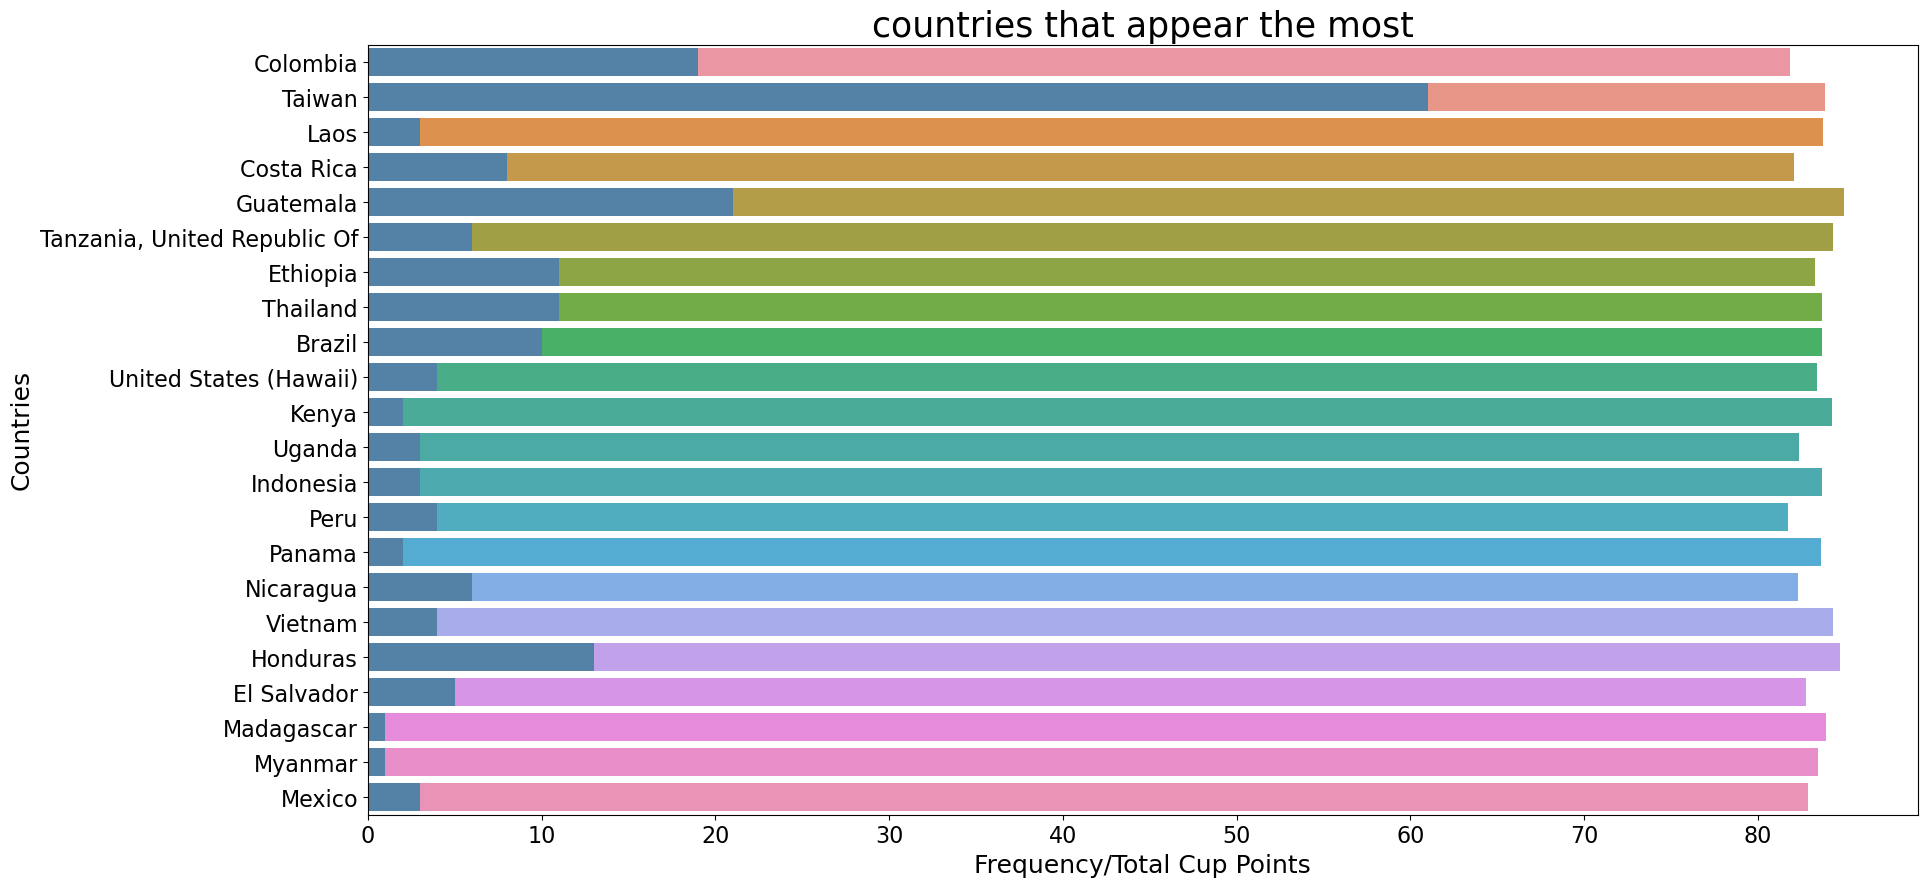

In [18]:
fig, ax = plt.subplots(figsize=(20,10))


sns.barplot(x=df_country['Total Cup Points'], y=df_country['Country of Origin'], orient='h')
sns.barplot(y=df['Country of Origin'], x=df['freq'], orient='h', color='steelblue')

ax.set_xlabel('Frequency/Total Cup Points', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
ax.set_title('countries that appear the most', size=25)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

plt.show()

In [19]:
fig = px.scatter(data_frame=df_graph, x="Processing Method", y="Country of Origin",
                 color="Processing Method", title="Processing method of countries", height=700)
fig.update_traces(marker_size=8)

fig.show()

In [20]:
X = df.drop(columns=['Category One Defects', 'Category Two Defects']).values

y_one = df.loc[:, 'Category One Defects'].values
y_two = df.loc[:, 'Category Two Defects'].values

In [21]:
X.shape, y_one.shape

((201, 28), (201,))

In [22]:
np.unique(y_one, return_counts=True)

(array([0, 1, 2], dtype=int64), array([190,   6,   5], dtype=int64))

In [23]:
np.unique(y_two, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 12], dtype=int64),
 array([74, 33, 37, 16, 13, 13,  4,  4,  2,  3,  2], dtype=int64))

<Axes: ylabel='count'>

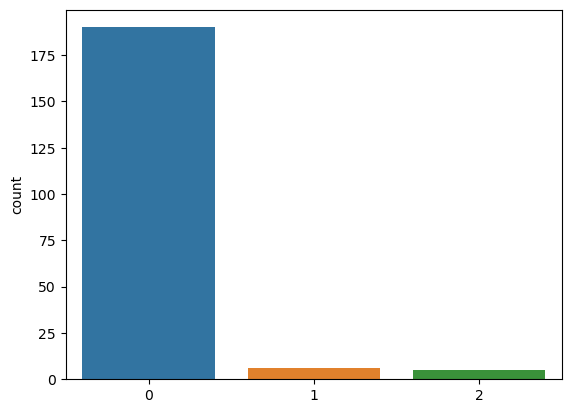

In [24]:
sns.countplot(x=y_one)

<Axes: ylabel='count'>

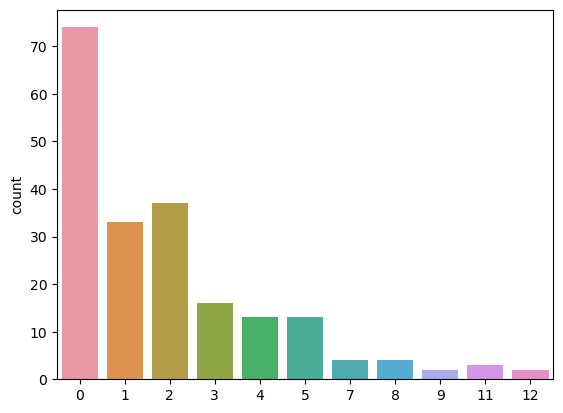

In [25]:
sns.countplot(x=y_two)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for i in range(X.shape[1]):
  X[:,i] = label.fit_transform(X[:,i])
X

array([[1, 37, 48, ..., 20, 20, 10],
       [16, 90, 88, ..., 17, 10, 12],
       [9, 85, 107, ..., 17, 10, 2],
       ...,
       [13, 41, 8, ..., 8, 11, 5],
       [9, 0, 30, ..., 20, 20, 2],
       [0, 107, 15, ..., 11, 17, 7]], dtype=object)

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(sampling_strategy= 'minority',k_neighbors=1)

X_over_one, y_over_one = smote.fit_resample(X,y_one)
np.unique(y_over_one, return_counts=True)

X_over_two, y_over_two = smote.fit_resample(X,y_two)
np.unique(y_over_two, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 12], dtype=int64),
 array([74, 33, 37, 16, 13, 13,  4,  4, 74,  3,  2], dtype=int64))

In [29]:
X_scaler = StandardScaler()

X_scaled_one = X_scaler.fit_transform(X_over_one)
X_scaled_one

X_scaled_two = X_scaler.fit_transform(X_over_two)
X_scaled_two

array([[-1.08050917e+00, -1.21152738e+00, -4.78948476e-01, ...,
         1.07613462e+00,  1.85236760e+00,  4.52775934e-01],
       [ 1.16681911e+00,  2.60528850e-02,  4.42043856e-01, ...,
         5.17174308e-01, -1.37314496e-01,  1.11042230e+00],
       [ 1.18065914e-01, -9.06999698e-02,  8.79515214e-01, ...,
         5.17174308e-01, -1.37314496e-01, -2.17780952e+00],
       ...,
       [-6.46944352e-01,  2.90343868e-01, -1.49779661e+00, ...,
        -8.82857979e-03, -6.70868667e-01, -1.81604738e-01],
       [-9.41875326e-01,  4.28243747e-01,  1.03699033e-01, ...,
         6.02470295e-01,  5.04164362e-01,  2.49930531e-01],
       [-7.72225284e-01,  3.48921050e-01, -8.17512460e-01, ...,
         2.50839274e-01, -1.71737527e-01,  1.70303749e-03]])

In [30]:
# for i in range(X.shape[1]):
#   print(X_scaled[:,i].var())

In [31]:
# from sklearn.feature_selection import VarianceThreshold

# selecao = VarianceThreshold(threshold=0.9999999999999999)
# X_variancia = selecao.fit_transform(X_scaled)
# X_variancia.shape
# selecao.variances_

In [32]:
# indices = np.where(selecao.variances_ > 0.9999999999999999)
# indices
# colunas[indices]
# 4, 7, 8, 14, 18, 19, 26, 27, 28, 34

In [33]:
from sklearn.model_selection import train_test_split

X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_scaled_one, y_over_one, test_size=0.2, random_state=0)
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_scaled_two, y_over_two, test_size=0.25, random_state=43)

In [34]:
y_train_one

array([0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2,

In [35]:
y_train_two

array([ 9,  4,  9,  9,  9,  3,  4,  1,  0,  1,  7,  9,  3,  4,  9,  9,  0,
        0,  0,  9,  2,  4,  9,  9,  9,  3,  9,  1,  1,  0,  1,  2,  0,  0,
        9,  9,  4,  0,  2,  1,  0,  0,  3,  5,  0,  9,  0,  2,  9,  5,  3,
        0,  9,  9,  9,  2,  7,  9, 12,  1,  0,  9,  9,  0,  5,  0,  1,  9,
        1,  1,  3,  5,  0,  2,  0,  9,  5,  0,  0,  3, 11,  3,  0,  2,  9,
        9,  7,  9,  9,  2,  2,  9,  0,  0,  9,  9,  0,  1,  3,  5,  0,  2,
        9, 11,  3,  9,  8,  3,  9,  9,  2,  9,  9,  0,  2,  2,  0,  0,  9,
        0,  9,  0,  0,  9,  1,  2,  5,  9,  4,  0,  9,  2,  0,  2,  0,  0,
        2,  8,  0,  9,  0,  3,  3,  2,  2,  0,  0,  0,  2,  9,  2,  9, 12,
        9,  9,  1,  5,  0,  5,  0,  9,  9,  1,  5,  8,  0,  9,  1,  9,  0,
        0,  2,  0,  4,  0,  2,  2,  9,  0,  0,  2,  0,  1,  1,  1,  2,  2,
        9,  0,  1,  9,  9,  9,  9,  0,  9, 11,  4,  1,  0,  2,  2,  0,  9],
      dtype=int64)

In [36]:
# svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_one = SVC(kernel='rbf', C=1.0, random_state=0)
svm_one.fit(X_train_one, y_train_one)
y_pred_one = svm_one.predict(X_test_one)
accuracy_score(y_test_one, y_pred_one)

0.9871794871794872

In [37]:
# svm2

svm_two = SVC(kernel='rbf', C=1.0, random_state=0)
svm_two.fit(X_train_two, y_train_two)
y_pred_two = svm_two.predict(X_test_two)
accuracy_score(y_test_two, y_pred_two)

0.5507246376811594

In [38]:
# linear regression
from sklearn.linear_model import LinearRegression

regressor_one = LinearRegression()
regressor_one.fit(X_train_one, y_train_one)
y_pred_one = regressor_one.predict(X_test_one)
y_pred_one = np.round(y_pred_one)
accuracy_score(y_test_one, y_pred_one)

0.8205128205128205